In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/nn-q2/q2_ds.csv')

In [4]:
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [5]:
# Drop unnecessary columns
df = df.drop(columns=['id','Date','Lattitude','Longitude'])

In [6]:
# Separate features (X) and target variable (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Convert DataFrame to NumPy arrays
X = np.asarray(X)
y = np.asarray(y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Standardize the target variable
y_train_mean = np.mean(y)
y_train_std = np.std(y)
y = (y - y_train_mean) / y_train_std

In [7]:
y

array([ 5.0094382 ,  2.34291528,  1.79872693, ..., -0.89772635,
       -0.90861012, -1.06914568])

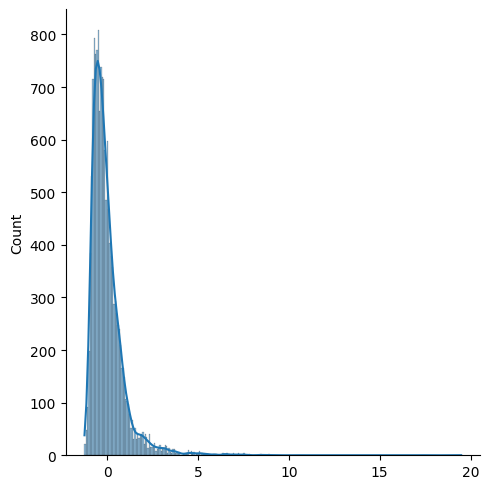

In [8]:
# Plot the distribution of the target variable
sns.displot(y,kde=True)

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Print the shapes of training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11696, 18) (2924, 18) (11696,) (2924,)


In [10]:
# Neural network architecture
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1

# Initialize weights and biases
np.random.seed(42)
hidden_weights = np.random.randn(input_size, hidden_size)
hidden_bias = np.zeros(hidden_size)
output_weights = np.random.randn(hidden_size, output_size)
output_bias = np.zeros(output_size)

In [11]:
# Set hyperparameters
learning_rate = 0.001
num_epochs = 5000

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, hidden_weights) + hidden_bias
    hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))
    predictions = np.dot(hidden_layer_output, output_weights) + output_bias
    
    # Calculate the mean squared error loss
    loss = np.mean((predictions - y_train.reshape(-1,1))**2)
    
    # Backpropagation
    output_error = 2 * (predictions - y_train.reshape(-1,1))
    hidden_error = np.dot(output_error, output_weights.T)*hidden_layer_output * (1 - hidden_layer_output)
    
    # Update weights and biases using gradient descent
    output_weights -= learning_rate * np.dot(hidden_layer_output.T, output_error) / len(y_train)
    output_bias -= learning_rate * np.sum(output_error) / len(y_train)
    
    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss: {loss:.4f}")

Epoch 0, loss: 8.6531
Epoch 100, loss: 6.4206
Epoch 200, loss: 5.1540
Epoch 300, loss: 4.3382
Epoch 400, loss: 3.7670
Epoch 500, loss: 3.3463
Epoch 600, loss: 3.0269
Epoch 700, loss: 2.7793
Epoch 800, loss: 2.5844
Epoch 900, loss: 2.4287
Epoch 1000, loss: 2.3026
Epoch 1100, loss: 2.1990
Epoch 1200, loss: 2.1128
Epoch 1300, loss: 2.0401
Epoch 1400, loss: 1.9778
Epoch 1500, loss: 1.9238
Epoch 1600, loss: 1.8764
Epoch 1700, loss: 1.8343
Epoch 1800, loss: 1.7964
Epoch 1900, loss: 1.7621
Epoch 2000, loss: 1.7307
Epoch 2100, loss: 1.7017
Epoch 2200, loss: 1.6748
Epoch 2300, loss: 1.6496
Epoch 2400, loss: 1.6259
Epoch 2500, loss: 1.6036
Epoch 2600, loss: 1.5824
Epoch 2700, loss: 1.5622
Epoch 2800, loss: 1.5430
Epoch 2900, loss: 1.5245
Epoch 3000, loss: 1.5069
Epoch 3100, loss: 1.4899
Epoch 3200, loss: 1.4735
Epoch 3300, loss: 1.4578
Epoch 3400, loss: 1.4425
Epoch 3500, loss: 1.4278
Epoch 3600, loss: 1.4136
Epoch 3700, loss: 1.3998
Epoch 3800, loss: 1.3864
Epoch 3900, loss: 1.3734
Epoch 4000, 

In [56]:
# Testing phase
hidden_layer_input = np.dot(X_test, hidden_weights) + hidden_bias
hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))
predicted_prices = np.dot(hidden_layer_output, output_weights) + output_bias

# Print the predicted prices in original scale
print(predicted_prices.flatten())

# Calculate and print the test loss
test_loss = np.mean((predicted_prices - y_test.reshape(-1,1))**2)
print(f"Test Loss: {test_loss:.4f}")

# Calculate and print Root Mean Square Error (RMSE)
MSE = np.square(np.subtract(y_test,predicted_prices)).mean()
RMSE = np.sqrt(MSE)
print("Root Mean Square: ", RMSE)

[-0.11873923  1.14902068 -0.68575911 ...  0.62647071 -0.16030957
 -0.23002574]
Test Loss: 1.1710
Root Mean Square:  1.4929896166291436


In [13]:
# Convert predicted prices back to original scale

hidden_layer_input = np.dot(X_test, hidden_weights) + hidden_bias
hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))
predicted_prices = np.dot(hidden_layer_output, output_weights) + output_bias

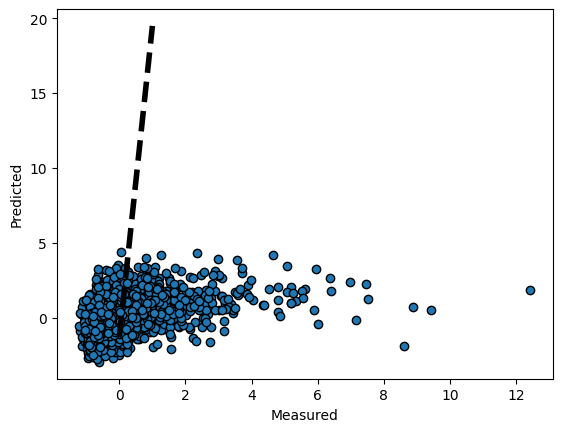

In [14]:
# Plot the measured vs predicted values
fig,ax = plt.subplots()
ax.scatter(y_test, predicted_prices, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [15]:
predicted_prices_original_scale = (predicted_prices * y_train_std) + y_train_mean

In [16]:
predicted_prices_original_scale

array([[-224177.83003295],
       [ 597414.37567277],
       [ 295296.43539755],
       ...,
       [1100291.98975118],
       [ 209975.43724693],
       [ 554700.41880918]])

In [17]:
y_test_original_scale = (y_test * y_train_std) + y_train_mean

In [18]:
# Evaluate the model using R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test_original_scale, predicted_prices_original_scale)
print(f"R-squared score on the test set: {r2}")

R-squared score on the test set: -0.23495689574873313
